In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore,boxcox
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Importing the Dataset

In [2]:
df_train=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


There are 8523 rows and 12 columns.
Its a regression problem.
some of the values are missing.
label encoding needs to be done for some of the columns.
Item outlet sales is the output  variable.

In [3]:
df_test=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


This is the test data where we have to predict the item_outlet sales.

In [4]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Item_weight and outlet size has null values.

In [5]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Item_weight and outlet size has null values.

# Univariant,Bivariant,Multivariant Analysis

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

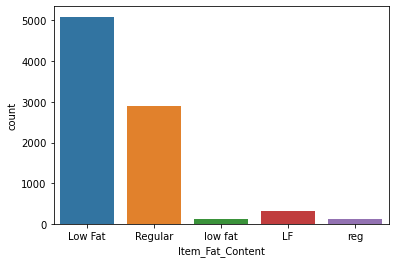

In [6]:
sns.countplot(x='Item_Fat_Content',data=df_train)

Item fat content has 5 categories and low fat has highest number of products.

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

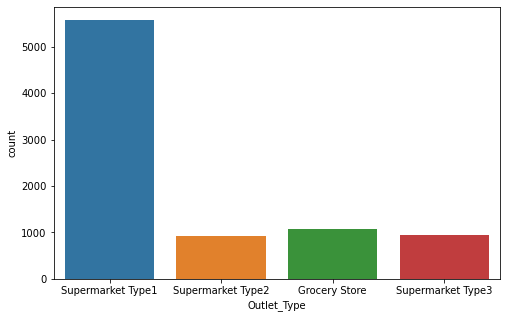

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Type',data=df_train)

There are 4 outlet types and supermarket type 1 is of highest number.

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

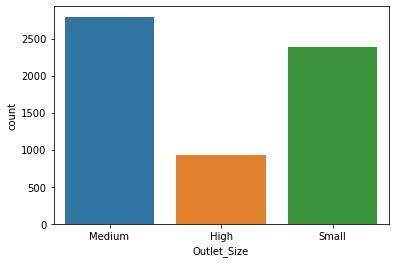

In [8]:
sns.countplot(x='Outlet_Size',data=df_train)

Outlet size is of 3 types and medium is the highest in number.

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

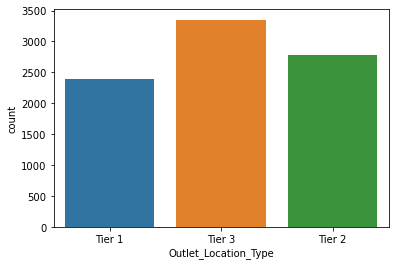

In [9]:
sns.countplot(x='Outlet_Location_Type',data=df_train)

Tier 3 has highest number of outlets

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

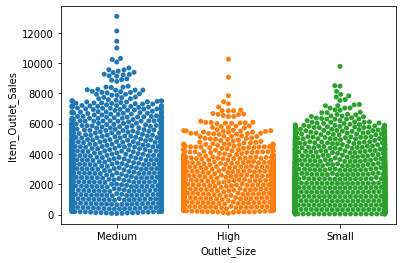

In [10]:
sns.swarmplot(y='Item_Outlet_Sales',x='Outlet_Size',data=df_train)

Medium size outlets have highest number of sales.

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

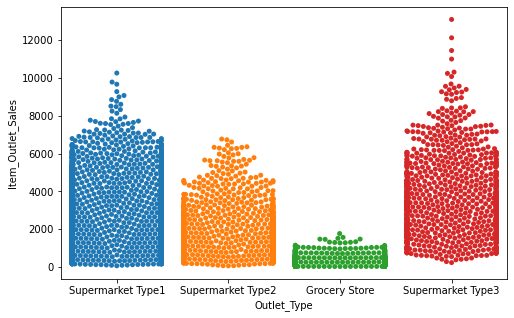

In [11]:
plt.figure(figsize=(8,5))
sns.swarmplot(y='Item_Outlet_Sales',x='Outlet_Type',data=df_train)

Supermarket type 3 item_outlet_sales is highest in number and grocery store sales is the least.

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

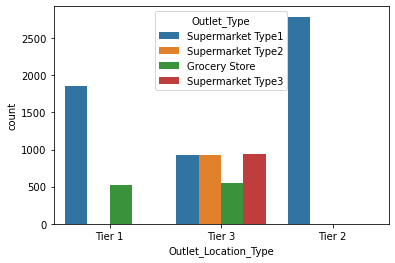

In [12]:
sns.countplot(hue='Outlet_Type',x='Outlet_Location_Type',data=df_train)

tier 2 has only supermarket type 1 stores while tier 3 has almost every type of outlet.

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

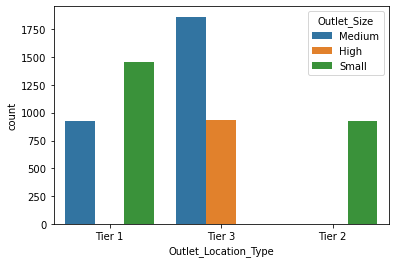

In [13]:
sns.countplot(hue='Outlet_Size',x='Outlet_Location_Type',data=df_train)

Tier 3 has medium size outlets highest in number.

# DATA CLEANING

## Removing outliers

In [14]:
weight=df_train.pivot_table(values='Item_Weight',index='Item_Identifier') #train dataset
weight

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [15]:
miss_bool=df_train['Item_Weight'].isnull() #missing values in item weight
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [16]:
for i,item in enumerate(df_train['Item_Identifier']):
    if miss_bool[i]:
        if item in weight:
            df_train['Item_Weight'][i]=weight.loc[item]['Item_Weight']
        else:
            df_train['Item_Weight'][i]= np.mean(df_train['Item_Weight'])


In [17]:
size=df_train.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))
size  #missing values in outlet type

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [18]:
miss_bool=df_train['Outlet_Size'].isnull()
df_train.loc[miss_bool,'Outlet_Size']=df_train.loc[miss_bool,'Outlet_Type'].apply(lambda x: size[x])

In [19]:
df_train['Outlet_Type'].isnull().sum()

0

In [20]:
weight=df_test.pivot_table(values='Item_Weight',index='Item_Identifier') #missing value in item weight test dataset
weight

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [21]:
miss_bool=df_test['Item_Weight'].isnull()     
miss_bool

0       False
1       False
2       False
3       False
4        True
        ...  
5676    False
5677    False
5678    False
5679    False
5680    False
Name: Item_Weight, Length: 5681, dtype: bool

In [22]:
for i,item in enumerate(df_test['Item_Identifier']):
    if miss_bool[i]:
        if item in weight:
            df_test['Item_Weight'][i]=weight.loc[item]['Item_Weight']
        else:
            df_test['Item_Weight'][i]= np.mean(df_test['Item_Weight'])


In [23]:
size=df_test.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))
size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [24]:
miss_bool=df_test['Outlet_Size'].isnull()
df_test.loc[miss_bool,'Outlet_Size']=df_test.loc[miss_bool,'Outlet_Type'].apply(lambda x: size[x])

In [25]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [26]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Merging small values in large one

In [27]:
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
df_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [28]:
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
df_test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

# Replacing zero

In [29]:
df_train['Item_Visibility'].replace([0],[df_train['Item_Visibility'].mean()],inplace=True)

In [30]:
df_test['Item_Visibility'].replace([0],[df_test['Item_Visibility'].mean()],inplace=True)

In [31]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# Checking outliers in train and test dataset

Item_Weight                     AxesSubplot(0.125,0.536818;0.110714x0.343182)
Item_Visibility              AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Item_MRP                     AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Outlet_Establishment_Year    AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Item_Outlet_Sales            AxesSubplot(0.656429,0.536818;0.110714x0.343182)
dtype: object

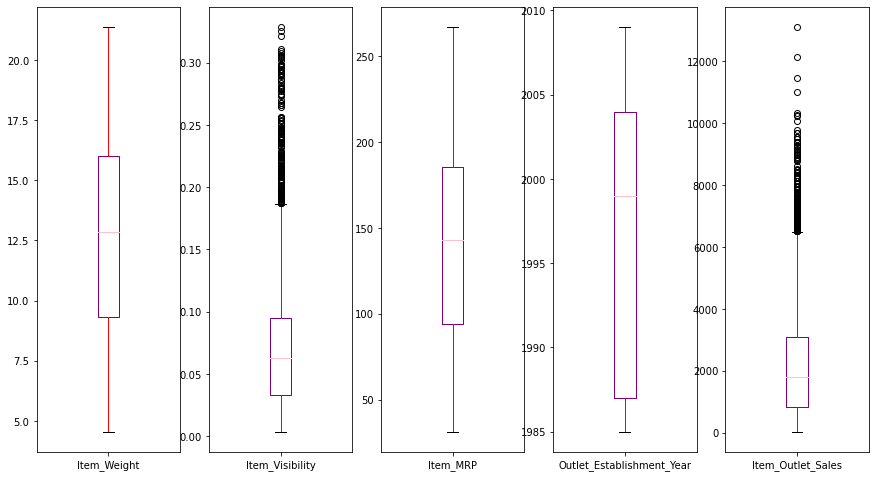

In [32]:
color=dict(boxes="Purple",whiskers="Red",medians="Pink",caps="Black")
df_train.plot(kind="box",subplots=True,layout=(2,6),figsize=(18,18),color=color)

Item_Weight                     AxesSubplot(0.125,0.536818;0.110714x0.343182)
Item_Visibility              AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Item_MRP                     AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Outlet_Establishment_Year    AxesSubplot(0.523571,0.536818;0.110714x0.343182)
dtype: object

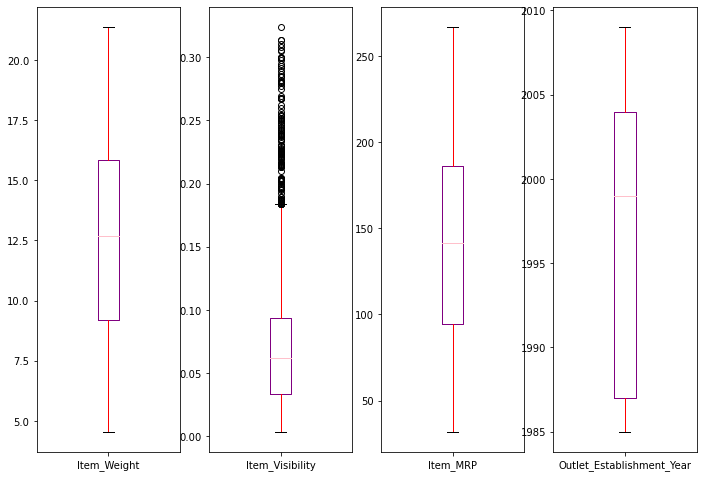

In [33]:
color=dict(boxes="Purple",whiskers="Red",medians="Pink",caps="Black")
df_test.plot(kind="box",subplots=True,layout=(2,6),figsize=(18,18),color=color)

# Label Encoding

In [34]:
le=LabelEncoder()  #train dataset
name=['Outlet_Location_Type','Outlet_Type','Item_Fat_Content','Outlet_Size','Item_Type','Item_Identifier','Outlet_Identifier']
for val in name:
    df_train[val]=le.fit_transform(df_train[val].astype(str))

In [35]:
le=LabelEncoder()    #test dataset
name=['Outlet_Location_Type','Outlet_Type','Item_Fat_Content','Outlet_Size','Item_Type','Item_Identifier','Outlet_Identifier']
for val in name:
    df_test[val]=le.fit_transform(df_test[val].astype(str))

In [36]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.066132,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.930,0,0.066132,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


# Removing outliers in train and test dataset

In [37]:
zp=np.abs(zscore(df_train))   #removing outliers present the dataset
zp
threshold=3
print(np.where(zp>3))

(array([  49,   83,  108,  130,  145,  174,  276,  304,  333,  373,  434,
        456,  472,  502,  521,  532,  661,  694,  753,  809,  847,  854,
        935,  991,  997, 1009, 1138, 1159, 1254, 1272, 1291, 1311, 1324,
       1434, 1450, 1496, 1501, 1506, 1560, 1575, 1644, 1651, 1805, 1827,
       1841, 1859, 1998, 2088, 2109, 2122, 2216, 2238, 2251, 2293, 2324,
       2439, 2445, 2516, 2535, 2586, 2613, 2728, 2776, 2855, 2895, 3017,
       3083, 3087, 3098, 3154, 3206, 3234, 3286, 3399, 3407, 3458, 3474,
       3488, 3497, 3540, 3667, 3709, 3720, 3750, 3757, 3767, 3884, 3993,
       4006, 4219, 4289, 4346, 4349, 4382, 4408, 4530, 4538, 4656, 4674,
       4676, 4681, 4772, 4789, 4888, 4941, 4961, 4987, 4991, 5031, 5050,
       5065, 5150, 5177, 5185, 5223, 5287, 5315, 5374, 5500, 5550, 5619,
       5732, 5734, 5752, 5795, 5799, 5812, 5837, 5880, 5891, 5946, 5977,
       6000, 6008, 6012, 6134, 6179, 6334, 6409, 6536, 6537, 6541, 6576,
       6606, 6622, 6674, 6786, 6886, 6903, 6993, 7

In [38]:
df_new_train=df_train[(zp<3).all(axis=1)]
df_new_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.066132,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.930,0,0.066132,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [39]:
df_new_train.skew()

Item_Identifier             -0.007589
Item_Weight                  0.089363
Item_Fat_Content             0.620198
Item_Visibility              0.864331
Item_Type                    0.098136
Item_MRP                     0.138877
Outlet_Identifier           -0.065455
Outlet_Establishment_Year   -0.423858
Outlet_Size                 -0.855385
Outlet_Location_Type        -0.202747
Outlet_Type                  0.957677
Item_Outlet_Sales            0.877845
dtype: float64

# Feature selection

In [40]:
df_new_train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)

In [41]:
df_test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)

# Dividing the train dataset in X and Y

In [42]:
x=df_new_train.iloc[:,0:-1]   #independent features
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0,0.016047,4,249.8092,1,0,1
1,5.920,1,0.019278,14,48.2692,1,2,2
2,17.500,0,0.016760,10,141.6180,1,0,1
3,19.200,1,0.066132,6,182.0950,2,2,0
4,8.930,0,0.066132,9,53.8614,0,2,1
...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,0,2,1
8519,8.380,1,0.046982,0,108.1570,2,1,1
8520,10.600,0,0.035186,8,85.1224,2,1,1
8521,7.210,1,0.145221,13,103.1332,1,2,2


In [43]:
y=df_new_train.iloc[:,-1]
y   #dependent features

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8334, dtype: float64

# Removing Skewness through yeo-johnson

In [44]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.8168068 , -0.73691762, -1.44257671, ..., -0.87176984,
        -1.376027  , -0.13560985],
       [-1.72449541,  1.35700378, -1.31329917, ..., -0.87176984,
         1.09519263,  1.05665568],
       [ 1.079394  , -0.73691762, -1.41369515, ..., -0.87176984,
        -1.376027  , -0.13560985],
       ...,
       [-0.49243905, -0.73691762, -0.73416897, ...,  0.85553421,
        -0.12653776, -0.13560985],
       [-1.36526114,  1.35700378,  1.55313536, ..., -0.87176984,
         1.09519263,  1.05665568],
       [ 0.48946968, -0.73691762, -0.423479  , ...,  0.85553421,
        -1.376027  , -0.13560985]])

# Standard Scaling

In [45]:
scaled=StandardScaler()
x=scaled.fit_transform(x)
x

array([[-0.8168068 , -0.73691762, -1.44257671, ..., -0.87176984,
        -1.376027  , -0.13560985],
       [-1.72449541,  1.35700378, -1.31329917, ..., -0.87176984,
         1.09519263,  1.05665568],
       [ 1.079394  , -0.73691762, -1.41369515, ..., -0.87176984,
        -1.376027  , -0.13560985],
       ...,
       [-0.49243905, -0.73691762, -0.73416897, ...,  0.85553421,
        -0.12653776, -0.13560985],
       [-1.36526114,  1.35700378,  1.55313536, ..., -0.87176984,
         1.09519263,  1.05665568],
       [ 0.48946968, -0.73691762, -0.423479  , ...,  0.85553421,
        -1.376027  , -0.13560985]])

In [46]:
x.shape

(8334, 8)

In [47]:
y.shape

(8334,)

# Performing Algorithms

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=10)

# Linear Regression

In [49]:
lr=LinearRegression()
lr.fit(x_train,y_train)
print("Cofficient is:",lr.coef_)
print("Intercept is: ",lr.intercept_)
sco=lr.score(x_train,y_train)
sco1=sco*100
print("Score is: ",sco1)
pred=lr.predict(x_test)

Cofficient is: [  -2.45817459   38.91574975  -29.55595545   10.22676864  903.65083785
    6.28893245 -176.73239828  728.20530161]
Intercept is:  2130.5734978752607
Score is:  50.76772264746655


In [50]:
mse=mean_squared_error(y_test,pred)
print("Mean Squared Error is: ",round(mse,2))
abse=mean_absolute_error(y_test,pred)
print("Mean Absolute Error is: ",round(abse,2))
scr=r2_score(y_test,pred)
print("R2 Score is: ",round(scr,2))
print(np.sqrt(mse))

Mean Squared Error is:  1257562.06
Mean Absolute Error is:  857.82
R2 Score is:  0.52
1121.4107467694973


# Ridge Regularization

In [51]:
lt1=Ridge(alpha=0.001) #choosing the best alpha
lt1.fit(x_train,y_train)
sw1=lt1.score(x_train,y_train)
print("Coffecient is: ",lt1.coef_)
print("Intercept is: ",lt1.intercept_)
pred=lt1.predict(x_test)
mse=mean_squared_error(y_test,pred)
print("Mean Squared Error is: ",round(mse,2))
abse=mean_absolute_error(y_test,pred)
print("Mean Absolute Error is: ",round(abse,2))
scr=r2_score(y_test,pred)
print("R2 Score is: ",round(scr,2))
print(np.sqrt(mse))


Coffecient is:  [  -2.45817317   38.91574713  -29.5559704    10.22677356  903.65067753
    6.28887765 -176.73231555  728.20511116]
Intercept is:  2130.573498919196
Mean Squared Error is:  1257562.07
Mean Absolute Error is:  857.82
R2 Score is:  0.52
1121.4107503725802


# SVR

In [52]:
svr1=SVR(kernel="linear")
svr1.fit(x_train,y_train)
sw2=svr1.score(x_train,y_train)
print("Coffecient is: ",svr1.coef_)
print("Intercept is: ",svr1.intercept_)
pred=svr1.predict(x_test)
print("Mean Squared Error is: ",round(mse,2))
abse=mean_absolute_error(y_test,pred)
print("Mean Absolute Error is: ",round(abse,2))
scr=r2_score(y_test,pred)
print("R2 Score is: ",round(scr,2))
print(np.sqrt(mse))


Coffecient is:  [[   6.14403532   25.66183897  -43.75888026    3.59290871  681.79872211
   -27.50154024 -109.14457113  549.19877863]]
Intercept is:  [1938.97868233]
Mean Squared Error is:  1257562.07
Mean Absolute Error is:  874.75
R2 Score is:  0.47
1121.4107503725802


# KNeighborsRegressor

In [53]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
sw2=knr.score(x_train,y_train)
pred=knr.predict(x_test)
print("Mean Squared Error is: ",round(mse,2))
abse=mean_absolute_error(y_test,pred)
print("Mean Absolute Error is: ",round(abse,2))
scr=r2_score(y_test,pred)
print("R2 Score is: ",round(scr,2))
print(np.sqrt(mse))

Mean Squared Error is:  1257562.07
Mean Absolute Error is:  811.7
R2 Score is:  0.51
1121.4107503725802


# CROSS VALIDATION SCORE

In [54]:
def rmse_cv(model,x_train,y_train):
    mse_cv_scores=-cross_val_score(model,x_train,y_train,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
    rmse_cv=np.sqrt(mse_cv_scores).mean()
    return(rmse_cv)

In [55]:
rmse_cv(lr,x_train,y_train)

1100.8899724951457

In [56]:
rmse_cv(lt1,x_train,y_train)

1100.8899721955645

In [57]:
rmse_cv(svr1,x_train,y_train)

1162.7521400193796

In [58]:
rmse_cv(knr,x_train,y_train)

1108.8963735334985

# HyperParameter Tunning

In [59]:
parameter={"fit_intercept":[True,False],
          "normalize":[True,False],
          "copy_X":[True,False],
          "n_jobs":np.arange(2,20),
          "positive":[True,False]}

In [60]:
gcv=GridSearchCV(LinearRegression(),parameter,cv=5)

In [61]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'normalize': [True, False],
                         'positive': [True, False]})

In [62]:
gcv.best_params_

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': 2,
 'normalize': True,
 'positive': False}

# Final Model

In [63]:
lr=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=2,normalize=True,positive=True)
lr.fit(x_train,y_train)
sw1=lr.score(x_train,y_train)
print("Coffecient is: ",lr.coef_)
print("Intercept is: ",lr.intercept_)
pred=lt1.predict(x_test)
print("Mean Squared Error is: ",round(mse,2))
abse=mean_absolute_error(y_test,pred)
print("Mean Absolute Error is: ",round(abse,2))
scr=r2_score(y_test,pred)
print("R2 Score is: ",round(scr,2))
print(np.sqrt(mse))


Coffecient is:  [  0.          38.79212031   0.          10.53884208 902.83995518
  67.1847527    0.         689.92008791]
Intercept is:  2130.070976848124
Mean Squared Error is:  1257562.07
Mean Absolute Error is:  857.82
R2 Score is:  0.52
1121.4107503725802


In [64]:
df_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0,0.007565,13,107.8622,1,0,1
1,8.300000,1,0.038428,4,87.3198,2,1,1
2,14.600000,0,0.099575,11,241.7538,2,2,0
3,7.315000,0,0.015388,13,155.0340,2,1,1
4,12.695633,1,0.118599,4,234.2300,1,2,3
...,...,...,...,...,...,...,...,...
5676,10.500000,1,0.013496,13,141.3154,2,0,1
5677,7.600000,1,0.142991,15,169.1448,1,2,2
5678,10.000000,0,0.073529,8,118.7440,2,1,1
5679,15.300000,1,0.065684,3,214.6218,2,1,1


In [65]:
x=df_test.iloc[:,0:8]
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0,0.007565,13,107.8622,1,0,1
1,8.300000,1,0.038428,4,87.3198,2,1,1
2,14.600000,0,0.099575,11,241.7538,2,2,0
3,7.315000,0,0.015388,13,155.0340,2,1,1
4,12.695633,1,0.118599,4,234.2300,1,2,3
...,...,...,...,...,...,...,...,...
5676,10.500000,1,0.013496,13,141.3154,2,0,1
5677,7.600000,1,0.142991,15,169.1448,1,2,2
5678,10.000000,0,0.073529,8,118.7440,2,1,1
5679,15.300000,1,0.065684,3,214.6218,2,1,1


In [66]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 1.77007391, -0.74081066, -1.83754459, ..., -0.88070526,
        -1.37374464, -0.12353311],
       [-1.03619283,  1.34987258, -0.6322502 , ...,  0.85321592,
        -0.13101959, -0.12353311],
       [ 0.49167513, -0.74081066,  0.85444969, ...,  0.85321592,
         1.08829997, -1.91575348],
       ...,
       [-0.59355557, -0.74081066,  0.33351522, ...,  0.85321592,
        -0.13101959, -0.12353311],
       [ 0.64562931,  1.34987258,  0.14733542, ...,  0.85321592,
        -0.13101959, -0.12353311],
       [-0.72091914,  1.34987258,  0.94206517, ...,  0.85321592,
        -0.13101959, -0.12353311]])

In [67]:
scaled=StandardScaler()
x=scaled.fit_transform(x)
x

array([[ 1.77007391, -0.74081066, -1.83754459, ..., -0.88070526,
        -1.37374464, -0.12353311],
       [-1.03619283,  1.34987258, -0.6322502 , ...,  0.85321592,
        -0.13101959, -0.12353311],
       [ 0.49167513, -0.74081066,  0.85444969, ...,  0.85321592,
         1.08829997, -1.91575348],
       ...,
       [-0.59355557, -0.74081066,  0.33351522, ...,  0.85321592,
        -0.13101959, -0.12353311],
       [ 0.64562931,  1.34987258,  0.14733542, ...,  0.85321592,
        -0.13101959, -0.12353311],
       [-0.72091914,  1.34987258,  0.94206517, ...,  0.85321592,
        -0.13101959, -0.12353311]])

In [68]:
x.shape

(5681, 8)

In [69]:
w=lr.predict(x)
w

array([1544.49829926, 1392.25033629, 2223.51231462, ..., 1815.92107063,
       3188.62975963, 1263.21805626])

In [70]:
y=pd.DataFrame({})
y['Sales']=w

In [71]:
y

,Sales
0,1544.498299
1,1392.250336
2,2223.512315
3,2349.724584
4,4728.091399
...,...
5676,2238.275363
5677,3313.966573
5678,1815.921071
5679,3188.629760


In [72]:
y.shape

(5681, 1)

In [73]:
df_test.shape

(5681, 8)

In [75]:
new=pd.concat([df_test,y],axis=1)
new

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Sales
0,20.750000,0,0.007565,13,107.8622,1,0,1,1544.498299
1,8.300000,1,0.038428,4,87.3198,2,1,1,1392.250336
2,14.600000,0,0.099575,11,241.7538,2,2,0,2223.512315
3,7.315000,0,0.015388,13,155.0340,2,1,1,2349.724584
4,12.695633,1,0.118599,4,234.2300,1,2,3,4728.091399
...,...,...,...,...,...,...,...,...,...
5676,10.500000,1,0.013496,13,141.3154,2,0,1,2238.275363
5677,7.600000,1,0.142991,15,169.1448,1,2,2,3313.966573
5678,10.000000,0,0.073529,8,118.7440,2,1,1,1815.921071
5679,15.300000,1,0.065684,3,214.6218,2,1,1,3188.629760


In [76]:
new.to_csv("test_result.csv")

# Saving the Model

In [74]:
import joblib
joblib.dump(lr,"finalmod10.pkl")

['finalmod10.pkl']